## Importing Libraries

In [78]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

### Reading the Dataset

In [2]:
cData = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [3]:
cData.head(20)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [36]:
# Attribute Information:
# ID                 : Customer ID
# Age                : Customer's age in completed years (Can be used as a lead)
# Experience         : #years of professional experience (May give some insights of increasing the loan)
# Income             : Annual income of the customer ($000)
# ZIP Code           : Home Address ZIP code.
# Family             : Family size of the customer
# CCAvg              : Avg. spending on credit cards per month ($000)
# Education          : Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional(Might transform for T/F)
# Mortgage           : Value of house mortgage if any. ($000)
# Personal Loan      : Did this customer accept the personal loan offered in the last campaign?
# Securities Account : Does the customer have a securities account with the bank?
# CD Account         : Does the customer have a certificate of deposit (CD) account with the bank?
# Online             : Does the customer use internet banking facilities?
# Credit card        : Does the customer use a credit card issued by

1 - Dropping 'zipcode' and 'id' as its a categorical variable and doesn't give us much info.
2 - Crearting Dummy Variable for Education column 
3 - 

In [4]:
cData = cData.drop('ZIP Code', axis=1) 

In [5]:
cData = cData.drop('ID', axis=1)

In [7]:
cData.head(20)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
5,37,13,29,4,0.4,2,155,0,0,0,1,0
6,53,27,72,2,1.5,2,0,0,0,0,1,0
7,50,24,22,1,0.3,3,0,0,0,0,0,1
8,35,10,81,3,0.6,2,104,0,0,0,1,0
9,34,9,180,1,8.9,3,0,1,0,0,0,0


In [8]:
cData.shape

(5000, 12)

In [9]:
cData.head(20)
cData['Education'] = cData['Education'].replace({1: 'Undergraduate', 2: 'Graduate',3: 'Advanced/Professional'}) 
cData = pd.get_dummies(cData, columns=['Education'])


In [10]:
cData.head(20)

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced/Professional,Education_Graduate,Education_Undergraduate
0,25,1,49,4,1.6,0,0,1,0,0,0,0,0,1
1,45,19,34,3,1.5,0,0,1,0,0,0,0,0,1
2,39,15,11,1,1.0,0,0,0,0,0,0,0,0,1
3,35,9,100,1,2.7,0,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,0,1,0,1,0
5,37,13,29,4,0.4,155,0,0,0,1,0,0,1,0
6,53,27,72,2,1.5,0,0,0,0,1,0,0,1,0
7,50,24,22,1,0.3,0,0,0,0,0,1,1,0,0
8,35,10,81,3,0.6,104,0,0,0,1,0,0,1,0
9,34,9,180,1,8.9,0,1,0,0,0,0,1,0,0


In [11]:
cData.describe()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced/Professional,Education_Graduate,Education_Undergraduate
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000,0.300200,0.280600,0.419200
std,11.463166,11.467954,46.033729,1.147663,1.747659,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637,0.458391,0.449337,0.493478
min,23.000000,-3.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
cData.dtypes #As we can see all attributes are either int or float

Age                                  int64
Experience                           int64
Income                               int64
Family                               int64
CCAvg                              float64
Mortgage                             int64
Personal Loan                        int64
Securities Account                   int64
CD Account                           int64
Online                               int64
CreditCard                           int64
Education_Advanced/Professional      uint8
Education_Graduate                   uint8
Education_Undergraduate              uint8
dtype: object

In [13]:
cData.median() 

Age                                45.0
Experience                         20.0
Income                             64.0
Family                              2.0
CCAvg                               1.5
Mortgage                            0.0
Personal Loan                       0.0
Securities Account                  0.0
CD Account                          0.0
Online                              1.0
CreditCard                          0.0
Education_Advanced/Professional     0.0
Education_Graduate                  0.0
Education_Undergraduate             0.0
dtype: float64

Median Age is 45 with median experience of 20 years and median salary of 64000. Median Family size is 2  

In [14]:
cData.mean() #mean doesn't give a good sense of the data, will go by median.

Age                                45.338400
Experience                         20.104600
Income                             73.774200
Family                              2.396400
CCAvg                               1.937938
Mortgage                           56.498800
Personal Loan                       0.096000
Securities Account                  0.104400
CD Account                          0.060400
Online                              0.596800
CreditCard                          0.294000
Education_Advanced/Professional     0.300200
Education_Graduate                  0.280600
Education_Undergraduate             0.419200
dtype: float64

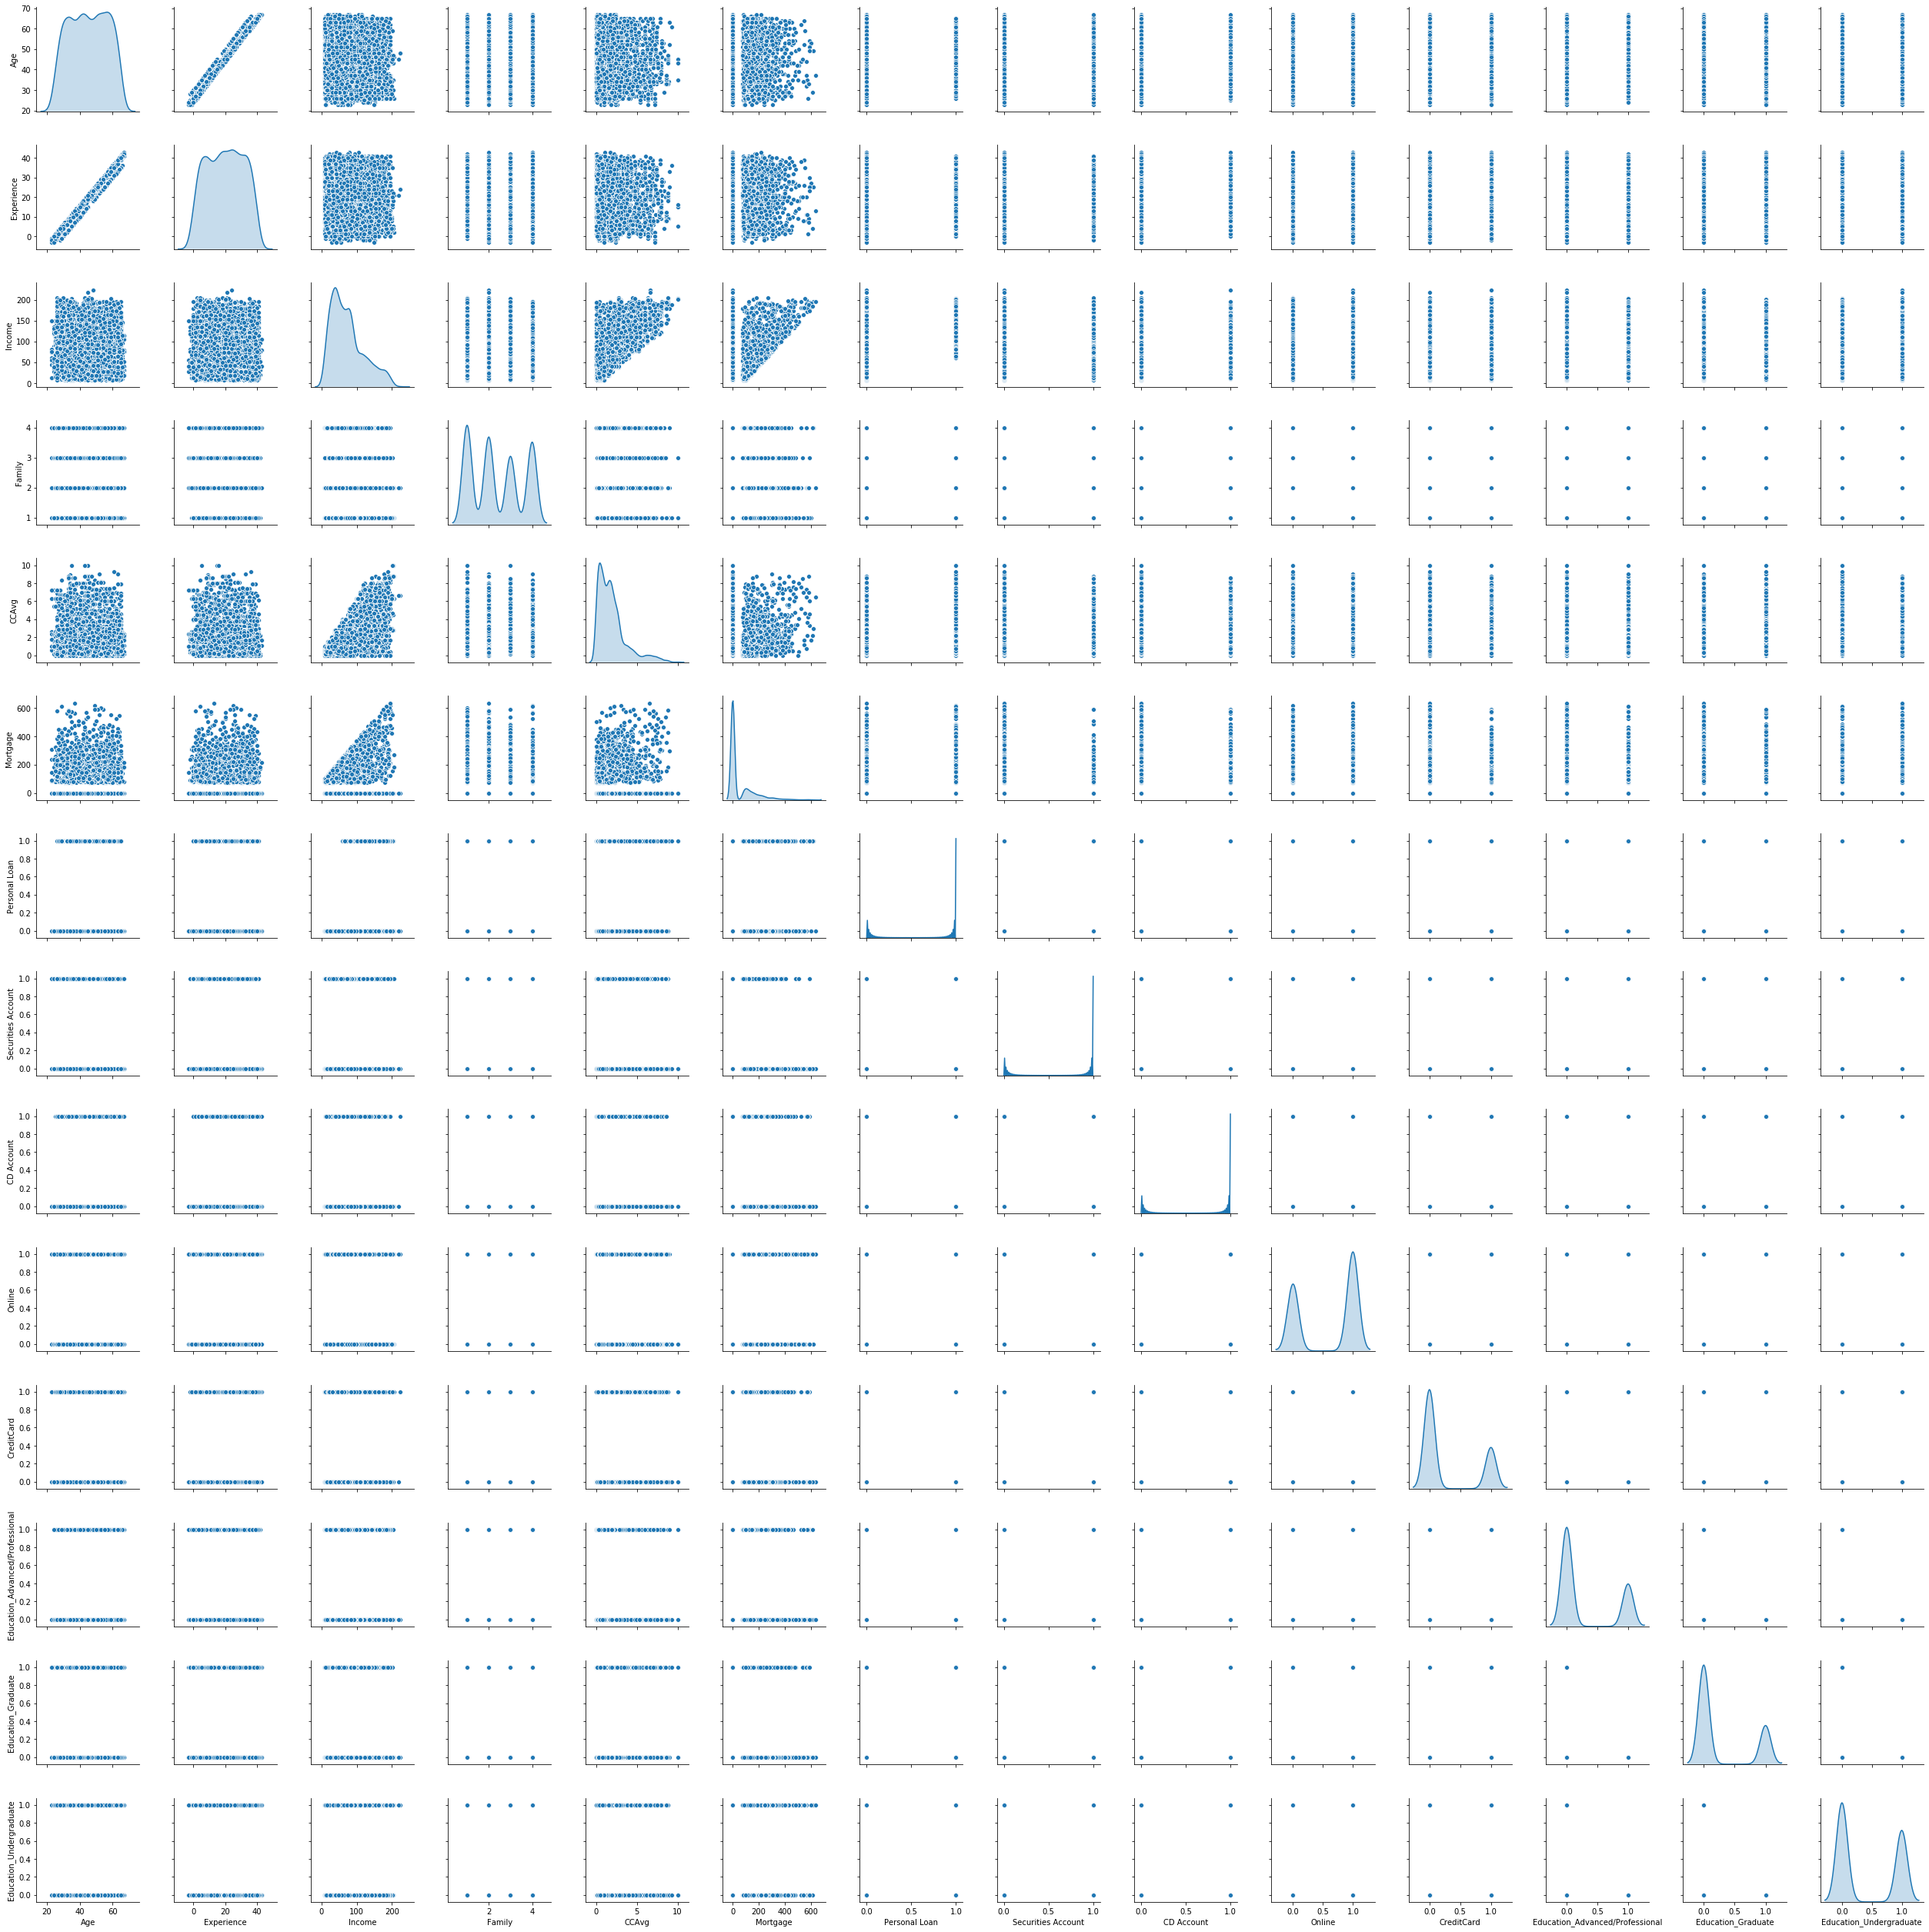

In [52]:
sns.pairplot(cData, diag_kind='kde')

### Study the data distribution in each attribute, share your findings

1 - We can see from above plot that with increase in age experience increases, which is definitive.
2 - Majority of people have not taken personal loan last time it was offered.
3 - As the income increases mortage might be higher.
4 - Minimum threshold for CCAvg increase with increase in income.
5 - Same goes for Mortgage with income.

### Get the target column distribution. Your comments

In [ ]:
#Target Column should be personal Loan as our objective is to offer more Personal loans! 


### Split the data into training and test set in the ratio of 70:30

In [42]:
#independent varible
X = cData.drop(['Personal Loan', 'Education_Advanced/Professional'], axis=1)
#dependent Variable
y = cData[['Personal Loan']]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=1)

In [55]:
X_train.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_Graduate,Education_Undergraduate
1334,47,22,35,2,1.3,0,0,0,1,0,0,1
4768,38,14,39,1,2.0,0,0,0,1,0,1,0
65,59,35,131,1,3.8,0,0,0,1,1,0,1
177,29,3,65,4,1.8,244,0,0,0,0,1,0
4489,39,13,21,3,0.2,0,0,0,1,0,1,0


### Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans

#### Logistic Regression

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CFBE77EB08>,
      dtype=object)

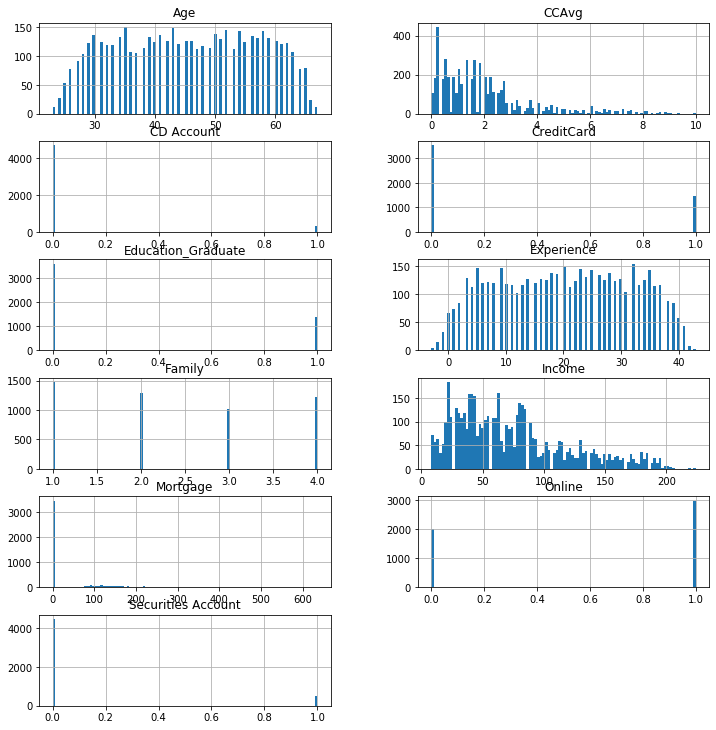

In [43]:
columns = list(X)[0:-1]
X[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2))

In [48]:
cData.corr()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced/Professional,Education_Graduate,Education_Undergraduate
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052012,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681,0.045838,-0.016264,-0.027770
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050077,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967,0.020967,-0.018197,-0.002907
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645984,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385,-0.108878,-0.128364,0.218019
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588,-0.008744,0.139201,-0.118628
CCAvg,-0.052012,-0.050077,0.645984,-0.109275,1.000000,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689,-0.080413,-0.090366,0.156979
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109905,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231,-0.014942,-0.031806,0.042841
Personal Loan,-0.007726,-0.007413,0.502462,0.061367,0.366889,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802,0.090212,0.071491,-0.148894
Securities Account,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028,-0.012421,0.005134,0.006863
CD Account,0.008043,0.010353,0.169738,0.014110,0.136534,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644,0.009780,0.006089,-0.014630
Online,0.013702,0.013898,0.014206,0.010354,-0.003611,-0.005995,0.006278,0.012627,0.175880,1.000000,0.004210,-0.023837,0.020590,0.003394


In [49]:
def plot_corr(df,size=11):
    corr=df.corr()
    fig, ax=plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

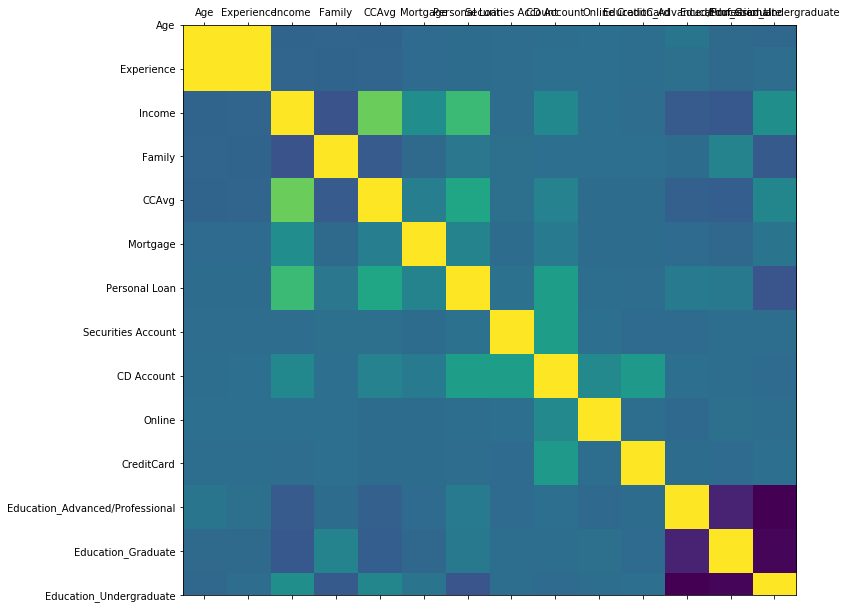

In [50]:
plot_corr(cData)

In [53]:
n_true= len(cData.loc[cData['Personal Loan'] == True])
n_false= len(cData.loc[cData['Personal Loan'] == False])
print("True Cases : {0}({1:2.2f}%)".format(n_true,(n_true / (n_true + n_false)) * 100))
print("False Cases : {0}({1:2.2f}%)".format(n_false,(n_false / (n_true + n_false)) * 100))

True Cases : 480(9.60%)
False Cases : 4520(90.40%)


In [82]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train.values.ravel())
y_predict = model.predict(X_test)

coef_df=pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)


          0         1         2         3         4         5         6  \
0 -0.275323  0.275874  0.053887  0.585139  0.193261  0.000928 -0.833873   

         7         8         9       10        11  intercept  
0  3.13255 -0.581173 -0.857008 -0.14487 -3.730523  -1.544919  


In [106]:
model_score_lr = model.score(X_test, y_test)
print("Model Score for Logistic Regression:", model_score_lr)
#Model Score for Logistics Regression is high

Model Score for Logistic Regression: 0.9573333333333334


#### K-NN

In [79]:
XScaled = X.apply(zscore)
XScaled.describe()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_Graduate,Education_Undergraduate
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,2.478018e-17,-1.693312e-16,1.939449e-16,7.850609e-16,-2.078338e-17,2.810197e-16,5.092149e-16,4.426903e-16,2.986500e-16,-3.697931e-16,-2.122302e-16,-6.365575e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.948906e+00,-2.014911e+00,-1.428969e+00,-1.216855e+00,-1.108987e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01,-6.245376e-01,-8.495664e-01
25%,-9.019702e-01,-8.812043e-01,-7.554825e-01,-1.216855e+00,-7.084116e-01,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01,-6.245376e-01,-8.495664e-01
50%,-2.952359e-02,-9.121982e-03,-2.123482e-01,-3.454321e-01,-2.506106e-01,-5.555239e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,-6.453143e-01,-6.245376e-01,-8.495664e-01
75%,8.429230e-01,8.629604e-01,5.263146e-01,5.259909e-01,3.216407e-01,4.375576e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,1.549632e+00,1.601185e+00,1.177071e+00
max,1.889859e+00,1.996667e+00,3.263712e+00,1.397414e+00,4.613525e+00,5.688108e+00,2.928915e+00,3.944146e+00,8.219509e-01,1.549632e+00,1.601185e+00,1.177071e+00


In [80]:
NNH = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [83]:
NNH.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [105]:
predicted_labels = NNH.predict(X_test)
model_score_knn = NNH.score(X_test,y_test)
print("Model Score for KNN:", model_score_knn)
#K-NN score = 0.90466666...

Model Score for KNN: 0.9046666666666666


#### Naive bayes

In [88]:
from sklearn.naive_bayes import GaussianNB

In [89]:
nb = GaussianNB()

In [92]:
nb.fit(X_train, y_train.values.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [93]:
nb_train_predict = nb.predict(X_train)

In [95]:
#Performance with Training Data
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_train_predict)))
print()
#Accuracy = 0.8949

Model Accuracy: 0.8949



In [97]:
#performance with testing data
nb_test_predict = nb.predict(X_test)
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_test_predict)))
#Accuracy - 0.8820

Model Accuracy: 0.8820


In [109]:
model_score_nb = model.score(X_test, y_test)
print("Model Score for Naive Bayes:", model_score_nb)

Model Score for Naive Bayes: 0.9573333333333334


### Print the confusion matrix for all the above models

In [74]:
#cm for logistics regression
cm_lr=metrics.confusion_matrix(y_test, y_predict, labels=[1,0])
print(cm_lr)
#So we have 54 False positives and 10 False Negative, and we have 95+1341= 1436 true predictions - Logistic Regression

[[  95   54]
 [  10 1341]]


In [87]:
#cm for K-NN
cm_knn=metrics.confusion_matrix(y_test, predicted_labels, labels=[1,0])
print(cm_knn)
#So we have 50 + 1307 = 1351 right predictions and 99+44=143 wrong predictions

[[  50   99]
 [  44 1307]]


In [98]:
#cm for Naive-bayes
cm_nb=metrics.confusion_matrix(y_test,nb_test_predict,labels=[1,0])
print(cm_nb)
# We have 87+1236 = 1323 correct predictions and 62+115= 177 incorrect predictions

[[  87   62]
 [ 115 1236]]


### Give your reasoning on which is the best model in this case and why it performs better?

The Logistic Regression model performes better! compared to K-NN and Naive bayes as it is not trying to find the relation between both but finds the probability of one dependent variable compared to other independent variable and tries to fit in the best line. Plus Logistics Regression has the best confusion matrix outcome.